<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Panel-frequency-tuning" data-toc-modified-id="Panel-frequency-tuning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Panel frequency tuning</a></span></li><li><span><a href="#Panel-OM-style" data-toc-modified-id="Panel-OM-style-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Panel OM style</a></span></li><li><span><a href="#Panel-spectrum" data-toc-modified-id="Panel-spectrum-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Panel spectrum</a></span><ul class="toc-item"><li><span><a href="#other-bias-points:-higher-order" data-toc-modified-id="other-bias-points:-higher-order-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>other bias points: higher order</a></span></li><li><span><a href="#other-bias-points:-50-Hz" data-toc-modified-id="other-bias-points:-50-Hz-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>other bias points: 50 Hz</a></span><ul class="toc-item"><li><span><a href="#estimating-50Hz-current-magnitude" data-toc-modified-id="estimating-50Hz-current-magnitude-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>estimating 50Hz current magnitude</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import stlabutils
import pickle

In [2]:
import numpy as np
import scipy.signal

In [3]:
import seaborn as sns
import matplotlib
matplotlib.rc_file_defaults()

sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('figures/my_rcparams.mplstyle')

# Panel frequency tuning

In [4]:
# tuning = pickle.load(open('figures/fig1_panel_d.pkl','rb'))
tuning = pickle.load(open('data_final/fig2_panel_f0fit.pkl','rb'))

Text(0.5, 1.0, '108.0866707578947')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


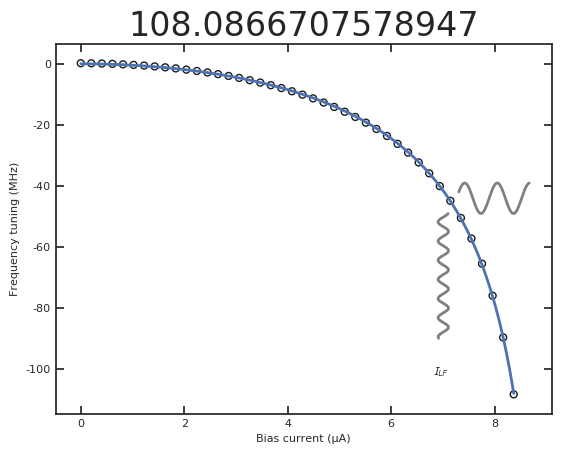

In [5]:
ii=700
x,y=tuning['xtheo'],tuning['ytheo']
y0 = y[0]
y = (y-y0)*1e3
tuningrange = max(abs(y))
xset,yset=x[ii],y[ii]-y0
xmeas,ymeas = tuning['x1'],(tuning['y1']-y0)*1e3

plt.plot(x,y)
plt.scatter(xmeas,ymeas,label='data',edgecolors='k',facecolors='None')
# plt.plot(xset,yset,'o',zorder=99)

yin = np.linspace(-90,yset,401)
xin = np.sin(yin)/10+xset
xinmin, xinmax = min(np.sin(yin)/10+xset)-0.2, max(np.sin(yin)/10+xset)+0.2
plt.plot(xin,yin-0.005,c='grey')

xout = np.linspace(xset,max(x),401)+0.2
yout = -np.cos((xout-xset)*10)*5+yset
plt.plot(xout+0.1,yout+5,c='grey')

plt.annotate("", xy=(xinmax, -95), xytext=(xinmin, -95), arrowprops=dict(arrowstyle="<->"))
plt.text(xset-0.2,-102,r'$I_{LF}$')
# plt.text(xset, 7.315, r'$I_{ac}+I_{dc}$',{'color': 'k', 'ha': 'center', 'va': 'center', 'fontsize':12,'rotation':'horizontal'})

# plt.xlim(4.25,8.5)
# plt.ylim(7.32-y0,7.45-y0)
plt.ylabel('Frequency tuning (MHz)')
plt.xlabel('Bias current (µA)')
plt.title(tuningrange)

# plt.tick_params(which='both',direction='in',labelbottom=False,labelleft=False)

In [6]:
panel_ftune = {'x':x,'y':y,'xset':xset,'yset':yset,'xin':xin,'yin':yin-0.005,'xout':xout+0.1,'yout':yout+5,
               'xmeas':xmeas,'ymeas':ymeas,
               'xlim':(4.25,8.5),'ylim':(7.32,7.45),
               'xlabel':'Bias current (a.u.)','ylabel':'Resonance frequency (a.u.)'}
pickle.dump(panel_ftune,open('data_final/fig2_panel_ftune.pkl','wb'))

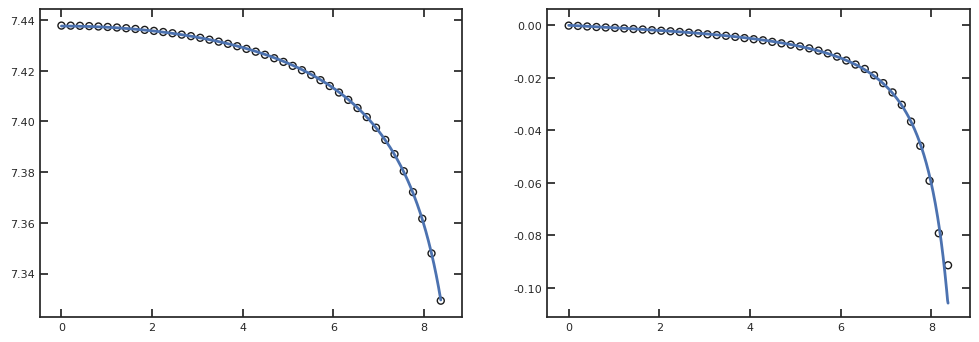

In [7]:
x,y=tuning['xtheo'],tuning['ytheo']
xmeas,ymeas=tuning['x1'],tuning['y1']
# x in uA, y in GHz
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
plt.sca(ax1)
plt.plot(x,y)
plt.scatter(xmeas,ymeas,label='data',edgecolors='k',facecolors='None')
plt.sca(ax2)
# in GHz/uA
plt.plot(x,np.gradient(y,x))
plt.scatter(xmeas,np.gradient(ymeas,xmeas),label='data',edgecolors='k',facecolors='None')

# Panel OM style

In [8]:
cavity = pickle.load(open('data_final/fig1_panel_c.pkl','rb'))
xcav = cavity['xtheo']
ycav = abs(cavity['ytheo'])

In [9]:
w0 = 1
wlf = 0.25
p0 = 0.8
plf = 0.3

dw = 0.1
pout=0.4
dp0 = 0.05
dplf=0.05

idx = np.argmin(ycav)
yy = ycav[idx:480]
yy = np.concatenate((yy[::-1],yy[1:]))
yy = 1-(yy-max(yy)) / (min(yy)-max(yy))
xx = np.linspace(-.5,.5,len(yy))+w0

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


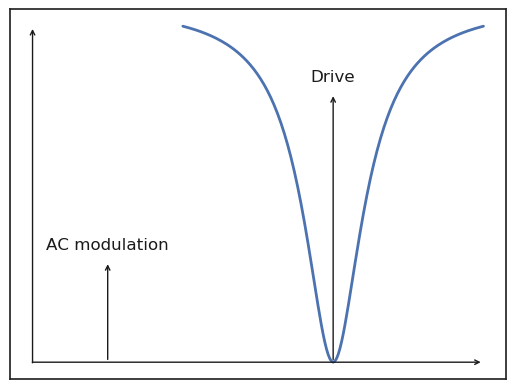

In [10]:
fig,ax = plt.subplots()
plt.plot(xx,yy)
plt.plot(0,0) # no need to scale this way
plt.annotate("", xy=(w0, p0), xytext=(w0, 0), arrowprops=dict(arrowstyle="->",color='k'))
plt.annotate("", xy=(wlf, plf), xytext=(wlf, 0), arrowprops=dict(arrowstyle="->",color='k'))
plt.text(w0, p0+dp0, 'Drive',{'color': 'k', 'ha': 'center', 'va': 'center', 'fontsize':12})
plt.text(wlf, plf+dplf, 'AC modulation',{'color': 'k', 'ha': 'center', 'va': 'center', 'fontsize':12})

# axes
plt.annotate("", xy=(0, 1), xytext=(0, -.01), arrowprops=dict(arrowstyle="->",color='k'),zorder=99)
plt.annotate("", xy=(max(xx), 0), xytext=(-1e-2, 0), arrowprops=dict(arrowstyle="->",color='k'))
# plt.plot([w0-dw,w0-dw],[0,pout],'C0')
# plt.plot([w0+dw,w0+dw],[0,pout],'C0')

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')


plt.show()
plt.close()

In [11]:
panel_omstyle = {'x':xx,'y':yy,'w0':w0,'p0':p0,'wlf':wlf,'plf':plf,'p02':p0+dp0,'plf2':plf+dplf}
pickle.dump(panel_omstyle,open('data_final/fig2_panel_omstyle.pkl','wb'))

# Panel spectrum

In [12]:
myfile = sorted(glob.glob(
    'data_raw/F32_megameasurement3/F33B*/*.dat'))
myfile = myfile[0]
# print(myfile)
data = stlabutils.readdata.readdat(myfile)
# data[0].head()
len(data)

['Frequency (Hz)', 'Spectrum (dBm)', 'RBW (Hz)', 'Is (A)', 'T (K)', 'Vmodpp (V)', 'Imodpp (A)', 'Modfrec (Hz)', 'Carrier Power (dBm)']


86

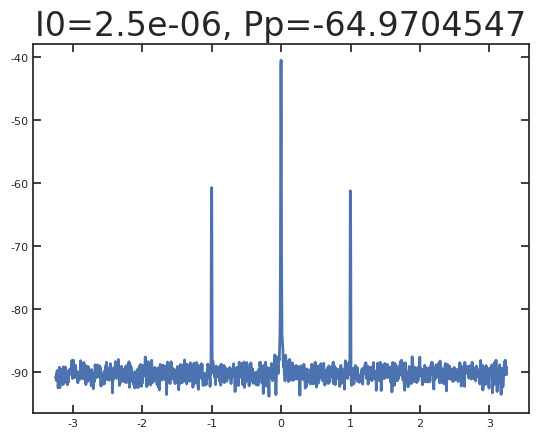

In [13]:
idx = 25
x0 = data[idx]['Frequency (Hz)'].values
f0 = x0[len(x0)//2]
xx = (x0-f0)/1e3 # frequency centered on f0 in kHz
yy = data[idx]['Spectrum (dBm)'].values
iset = data[idx]['Is (A)'].values[0]
ppump = data[idx]['Carrier Power (dBm)'].values[0]
ymax = np.max(yy)
# yy = yy-ymax
plt.plot(xx,yy)

# plt.xticks([-3,-1.5,0,1.5,3])
# plt.annotate("", xy=(1.5, -89.5-ymax), xycoords='data',
#              xytext=(1.5, -60.5-ymax), textcoords='data',
#              arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
# plt.text(1.75, -75-ymax, 'amplitude',
#          {'color': 'k', 'ha': 'center', 'va': 'center', 'fontsize':12,'rotation':'vertical'})

plt.title('I0='+str(iset)+', Pp='+str(ppump))
plt.show()
plt.close()

In [14]:
panel_a = {'x':xx,'y':yy,'ymax':ymax,'iset':iset,'ppump':ppump,
           'xlabel':r'Frequency (a.u.)','ylabel':'Power spectrum (dBm)'}
pickle.dump(panel_a,open('data_final/fig2_panel_spectrum.pkl','wb'))

## other bias points: higher order

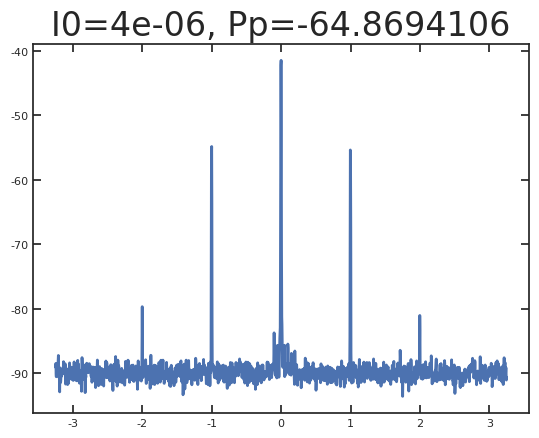

In [15]:
idx = 40
x0 = data[idx]['Frequency (Hz)'].values
f0 = x0[len(x0)//2]
xx = (x0-f0)/1e3 # frequency centered on f0 in kHz
yy = data[idx]['Spectrum (dBm)'].values
iset = data[idx]['Is (A)'].values[0]
ppump = data[idx]['Carrier Power (dBm)'].values[0]
ymax = np.max(yy)
# fig = plt.figure(figsize=(16,4))
plt.plot(xx,yy)
# plt.xlim(-1.5,1.5)

plt.title('I0='+str(iset)+', Pp='+str(ppump))
plt.show()
plt.close()

panel = {'x':xx,'y':yy,'ymax':ymax,'iset':iset,'ppump':ppump,
           'xlabel':r'Frequency (a.u.)','ylabel':'Power spectrum (dBm)'}
pickle.dump(panel,open('data_final/SM_spectrum_higher_order.pkl','wb'))

## other bias points: 50 Hz

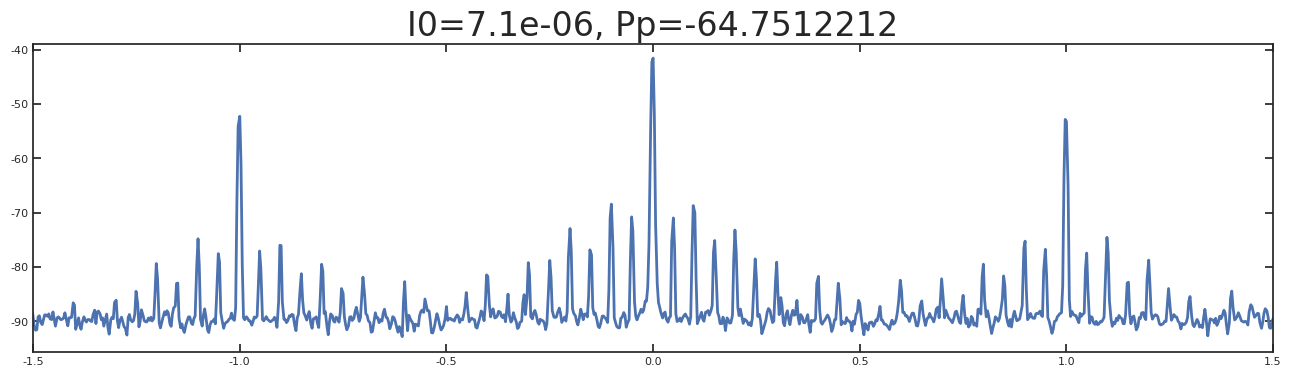

In [16]:
idx = -15
x0 = data[idx]['Frequency (Hz)'].values
f0 = x0[len(x0)//2]
xx = (x0-f0)/1e3 # frequency centered on f0 in kHz
yy = data[idx]['Spectrum (dBm)'].values
iset = data[idx]['Is (A)'].values[0]
ppump = data[idx]['Carrier Power (dBm)'].values[0]
ymax = np.max(yy)
fig = plt.figure(figsize=(16,4))
plt.plot(xx,yy)
plt.xlim(-1.5,1.5)

plt.title('I0='+str(iset)+', Pp='+str(ppump))
plt.show()
plt.close()

panel = {'x':xx,'y':yy,'ymax':ymax,'iset':iset,'ppump':ppump,
           'xlabel':r'Frequency (a.u.)','ylabel':'Power spectrum (dBm)'}
pickle.dump(panel,open('data_final/SM_spectrum_50Hz.pkl','wb'))

### estimating 50Hz current magnitude

We will use the $-1\Omega$ peak as reference for the 10nA input current.

In [17]:
vector = yy
indexes, _ = scipy.signal.find_peaks(vector,height=-85)

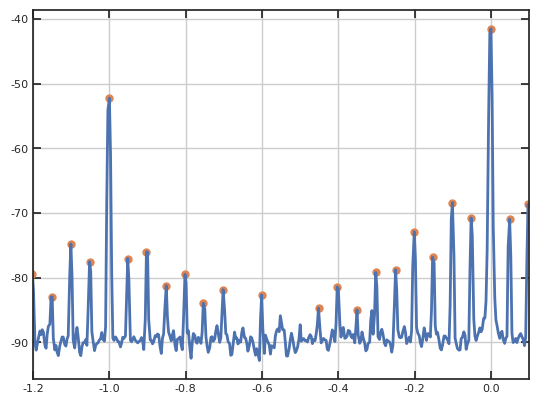

In [18]:
plt.plot(xx,yy)
plt.scatter(xx[indexes],yy[indexes],c='C1')
plt.xlim(-1.2,0.1)
plt.grid()
plt.show()
plt.close()

In [19]:
m1Omega_idx = int(np.where(xx==-1)[0])
m1Omega_freq = xx[m1Omega_idx]
m1Omega_valdB = yy[m1Omega_idx]

Inoise_valdB = -70 #approximate value
SNR = 10**((Inoise_valdB-m1Omega_valdB)/10)
Inoise_val = 10e-9 * SNR
print('Magnitude of 50Hz interference: %.0f pA = I_{LF}/%.0f' % (Inoise_val/1e-12,1/SNR))

Magnitude of 50Hz interference: 168 pA = I_{LF}/60
